In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def pre_format_convert_columns(df):
    farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']
    # year 1 or bigger
    for year in df['Year'].unique()[1:]:
        for farmer in df['owner-id'].unique():
            group = farmer_group.get_group((year, farmer))
            group_last_year = farmer_group.get_group((year-1, farmer))
            if (group.item() == 1.0) & (group_last_year.item() == 0.0):
                df.loc[group.index.item(), 'convert-to-WSA'] = 1
                df.loc[group.index.item(), 'converted-in-year'] = year
    return df

In [3]:
def format_convert_columns(df):
    dff = pd.DataFrame(columns = df.columns)
    for run in df['UniqueID'].unique():
        sub_df = df[df['UniqueID'] == run]
        sub_df = pre_format_convert_columns(sub_df)
        dff = pd.concat([dff, sub_df])
    return dff

In [4]:
def format_df(csv_path):
    df = pd.read_csv(csv_path)
    df['convert-to-WSA'] = 0
    df['converted-in-year'] = np.nan   # first year of wsa 
    df['knows-but-does-not-implement'] = 0
    df = df.drop(df[df['implements-WSA'] == 'implements-WSA'].index)
    
    df = df.astype({'owner-id':'float64', 'Year':'int64', 'xcor':'float64',
                'ycor':'float64', 'implements-WSA':'float64', 'owner-knows-WSA':'float64',
                 'yield':'float64', 'TotalYearRainfall':'float64', 'who':'int64',
                  'LeadFarmers':'int64'})
    df = format_convert_columns(df)
    ## make column knows-but-does-not-implement 1 for rows that need it
    df.loc[(df['implements-WSA'] == 0) & (df['owner-knows-WSA'] == 1), 
           'knows-but-does-not-implement'] = 1
    df['average-yield-per-field'] = df['yield'] / df['who']
    df = df.astype({'average-yield-per-field':'float64'})
    return df

In [5]:
df_5_no_c = format_df('modelOutputParamCombo0')
df_5_no_w = format_df('modelOutputParamCombo9')
df_5_no_w

/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])


,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement,average-yield-per-field
0,0.0,0,-24.5,22.50,0.0,0.0,200.000000,0.000000,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,50.000000
1,0.0,1,-24.5,22.50,0.0,0.0,232.529866,434.277079,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,58.132467
2,0.0,2,-24.5,22.50,0.0,0.0,221.982791,790.809540,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,55.495698
3,0.0,3,-24.5,22.50,0.0,0.0,225.806924,881.814459,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,56.451731
4,0.0,4,-24.5,22.50,0.0,0.0,228.363800,1020.357248,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,57.090950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,19.0,-16.25,1.0,1.0,241.879130,1469.055054,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.469782
248005,799.0,27,19.0,-16.25,1.0,1.0,242.355640,1631.687391,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.588910
248006,799.0,28,19.0,-16.25,1.0,1.0,247.686274,1428.967197,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,61.921568
248007,799.0,29,19.0,-16.25,1.0,1.0,235.229544,1557.718957,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,58.807386


In [6]:
df_5_hj_c = format_df('modelOutputParamCombo1')
df_5_hj_w = format_df('modelOutputParamCombo10')
df_5_lj_c = format_df('modelOutputParamCombo2')
df_5_lj_w = format_df('modelOutputParamCombo11')

/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. I

In [7]:
df_10_no_c = format_df('modelOutputParamCombo3')
df_10_no_w = format_df('modelOutputParamCombo12')

df_10_hj_c = format_df('modelOutputParamCombo4')
df_10_hj_w = format_df('modelOutputParamCombo13')

df_10_lj_c = format_df('modelOutputParamCombo5')
df_10_lj_w = format_df('modelOutputParamCombo14')

/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. I

In [8]:
df_20_no_c = format_df('modelOutputParamCombo6')
df_20_no_w = format_df('modelOutputParamCombo15')

df_20_hj_c = format_df('modelOutputParamCombo7')
df_20_hj_w = format_df('modelOutputParamCombo16')

df_20_lj_c = format_df('modelOutputParamCombo8')
df_20_lj_w = format_df('modelOutputParamCombo17')

/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/var/folders/qw/dj7vjbyd6kb8q83q6chjb9m00000gn/T/ipykernel_57443/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. I

In [9]:
df_10_hj_c

,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement,average-yield-per-field
0,0.0,0,13.0,-15.5,0.0,0.0,100.000000,0.000000,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,50.000000
1,0.0,1,13.0,-15.5,0.0,0.0,96.475014,562.632809,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,48.237507
2,0.0,2,13.0,-15.5,0.0,0.0,87.796407,864.589798,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,43.898204
3,0.0,3,13.0,-15.5,0.0,0.0,83.897271,1040.690023,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,41.948636
4,0.0,4,13.0,-15.5,0.0,0.0,89.723942,963.059953,2,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:16:50.182033,0,NaN,0,44.861971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,-7.0,20.0,1.0,1.0,61.124760,1266.171883,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,61.124760
248005,799.0,27,-7.0,20.0,1.0,1.0,59.780394,1277.112571,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,59.780394
248006,799.0,28,-7.0,20.0,1.0,1.0,63.380955,1317.856674,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,63.380955
248007,799.0,29,-7.0,20.0,1.0,1.0,60.794375,1456.247183,1,10,High Jealousy Tolerance,Current Climate,2023-11-28 19:17:16.689598,0,NaN,0,60.794375


In [10]:
df_5_no_w.dtypes

owner-id                        float64
Year                             object
xcor                            float64
ycor                            float64
implements-WSA                  float64
owner-knows-WSA                 float64
yield                           float64
TotalYearRainfall               float64
who                              object
LeadFarmers                      object
SocialScenario                   object
ClimateScenario                  object
UniqueID                         object
convert-to-WSA                   object
converted-in-year               float64
knows-but-does-not-implement     object
average-yield-per-field         float64
dtype: object

In [11]:
df_5_no_w.nunique()

owner-id                           800
Year                                31
xcor                               747
ycor                               731
implements-WSA                       2
owner-knows-WSA                      2
yield                           222935
TotalYearRainfall                   31
who                                 11
LeadFarmers                          1
SocialScenario                       1
ClimateScenario                      1
UniqueID                            10
convert-to-WSA                       2
converted-in-year                   19
knows-but-does-not-implement         2
average-yield-per-field         222925
dtype: int64

In [12]:
# wsa_group_c = df_5_no_c.groupby(['Year', 'implements-WSA'])['yield'].mean()
# wsa_group_w = df_5_no_w.groupby(['Year', 'implements-WSA'])['yield'].mean()
# wsa_group_c

In [13]:
#len(wsa_group_c)

In [14]:
# wsa_yr_group_c = wsa_group_c.groupby('implements-WSA')
# wsa_yr_group_w = wsa_group_w.groupby('implements-WSA')
# wsa_yr_group_c

In [15]:
# for implementsWSA, yld in wsa_yr_group_c:
#     print(implementsWSA, yld)

In [16]:
#wsa_yr_group_w.get_group(0.0)

In [17]:
def get_wsa_groups(df):
    wsa_group = df.groupby(['Year', 'implements-WSA'])["average-yield-per-field"].mean()
    wsa_yr_group = wsa_group.groupby('implements-WSA')
    return wsa_yr_group


In [18]:
def plot_avg_yield(df_current, df_warm):
    wsa_yr_group_c = get_wsa_groups(df_current)
    wsa_yr_group_w = get_wsa_groups(df_warm)
    
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    #ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
    ax.plot(wsa_yr_group_c.get_group(0.0).tolist(), label = "Traditional, Current Climate")
    ax.plot(wsa_yr_group_c.get_group(1.0).tolist(), label = "WSA, Current Climate")
    ax.plot(wsa_yr_group_w.get_group(0.0).tolist(), label = "Traditional, Warm Climate", linestyle = 'dashed')
    ax.plot(wsa_yr_group_w.get_group(1.0).tolist(), label = "WSA, Warm Climate", linestyle = 'dashed')
    ax.set_title("Average yield per year", fontsize=11)
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Average yield", fontsize=10)
    ax.legend(loc='best', ncol=2, fontsize=8)

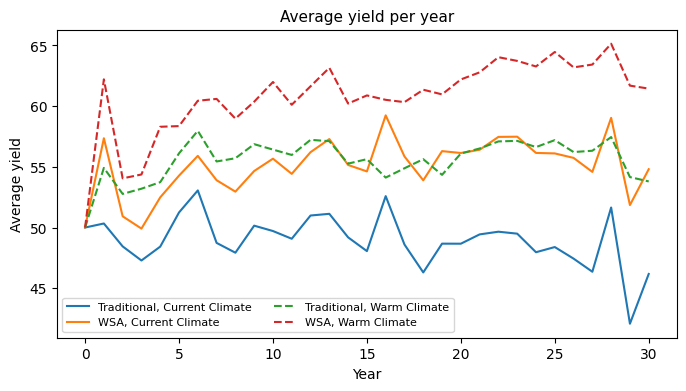

In [19]:
plot_avg_yield(df_5_no_c, df_5_no_w)

In [20]:
# farmer_group_5_no_c = df_5_no_c.groupby(['Year','owner-id'])['implements-WSA']
# farmer_group_5_no_w = df_5_no_w.groupby(['Year','owner-id'])['implements-WSA']

In [21]:
# farmer_group_5_no_c.groups

In [22]:
# farmer_group_5_no_c.get_group((3, 11.0))

In [23]:
# farmer_group_5_no_c.get_group((1, 0.0))

In [24]:
# farmer_group_5_no_c.get_group((9, 796.0))

In [25]:
# s =farmer_group_5_no_c.get_group((3, 11.0)).reset_index()
# idx = s['index']
# farmer_group_5_no_c.get_group((3, 11.0))[idx[0]]

In [26]:
# for i in idx:
#     print(i)

In [27]:
# df_5_no_c.loc[28606, 'convert-to-WSA'] 

In [28]:
# df_5_no_c['Year'].unique()[1:]

In [29]:
# df = df_5_no_c[df_5_no_c['UniqueID']== '2023-11-28 18:48:06.098940']
# farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']

In [30]:
# s = farmer_group.get_group((6, 700.0)).reset_index()
# for i in s['index']:
#     print(i)

In [31]:
# s['index'][0]

In [32]:
# df[df['UniqueID'] == '2023-11-28 18:48:06.098940'].loc[21706, 'implements-WSA'] 

In [33]:
# if (farmer_group.get_group((6, 700.0))==0.0).item():
#     print('hi')

In [34]:
# farmer_group.get_group((5, 700.0)).item() == 0.0

In [35]:
# farmer_group.get_group((5, 700.0)).index.item()

In [36]:
def get_wsa_uptake_per_year(df):
    wsa_uptake_percentages = []
    for year in df['Year'].unique():
        num_wsa = len(df[(df['Year'] == year) & (df['implements-WSA'] == 1)])
        everyone = len(df[(df['Year'] == year)])
        wsa_uptake_percentage = num_wsa / everyone * 100
        wsa_uptake_percentages.append(wsa_uptake_percentage)
    return wsa_uptake_percentages
    

In [37]:
def get_avg_wsa_uptake_per_year(df):
    runs = df['UniqueID'].unique()
    wsa_uptake_percentages_arrays = []
    for run in runs:
        wsa_uptake_percentages = get_wsa_uptake_per_year(df[df['UniqueID'] == run])
        wsa_uptake_percentages_arrays.append(wsa_uptake_percentages)
    avg = np.average(wsa_uptake_percentages_arrays, axis=0)
    return avg

In [38]:
def plot_wsa_uptake_soc(df_no, df_hj, df_lj):
    wsa_uptake_percentages_no = get_avg_wsa_uptake_per_year(df_no)
    wsa_uptake_percentages_hj = get_avg_wsa_uptake_per_year(df_hj)
    wsa_uptake_percentages_lj = get_avg_wsa_uptake_per_year(df_lj)

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

  
    ax.plot(wsa_uptake_percentages_no, label = "WSA Uptake %, No Desperation")
    ax.plot(wsa_uptake_percentages_hj, label = "WSA Uptake %, High Jealousy Tolerance")
    ax.plot(wsa_uptake_percentages_lj, label = "WSA Uptake %, Low Jealousy Tolerance")

    ax.set_title("Average WSA Uptake Percentage per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average WSA Uptake Percentage", fontsize=12)
    ax.legend(loc='best')

In [39]:
def plot_wsa_uptake_cli(df_current, df_warm):
    wsa_uptake_percentages_c = get_avg_wsa_uptake_per_year(df_current)
    wsa_uptake_percentages_w = get_avg_wsa_uptake_per_year(df_warm)
  
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

  
    ax.plot(wsa_uptake_percentages_c, label = "WSA Uptake %, Current Climate")
    ax.plot(wsa_uptake_percentages_w, label = "WSA Uptake %, Warm Climate")
    
    ax.set_title("Average WSA Uptake Percentage per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average WSA Uptake Percentage", fontsize=12)
    ax.legend(loc='best')

In [40]:
def get_convert_rate_per_year(df):
    convert_rates = []
    for year in df['Year'].unique()[1:]:
        conversions = len(df[(df['converted-in-year'] == year) & (df['convert-to-WSA'] == 1)])
        possible_conversions = len(df[(df['Year'] == year-1) & (df['knows-but-does-not-implement'] == 1)])
        if possible_conversions != 0:
            convert_rate = conversions / possible_conversions
        else:
            convert_rate = 0
        convert_rates.append(convert_rate)
    return convert_rates

In [41]:
def get_avg_convert_rate_per_year(df):
    runs = df['UniqueID'].unique()
    convert_rates_arrays = []
    for run in runs:
        convert_rates = get_convert_rate_per_year(df[df['UniqueID'] == run])
        convert_rates_arrays.append(convert_rates)
    avg = np.average(convert_rates_arrays, axis=0)
    return avg

In [42]:
def plot_conversion_rates(df_current, df_warm):
    convert_rates_c = get_avg_convert_rate_per_year(df_current)
    convert_rates_w = get_avg_convert_rate_per_year(df_warm)

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    #ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
    ax.plot(convert_rates_c[1:], label = "Conversion Rate, Current Climate")
    ax.plot(convert_rates_w[1:], label = "Conversion Rate, Warm Climate")

    ax.set_title("Average Conversion Rate from Traditional Practice to WSA per Year", fontsize=13)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average Conversion Rate", fontsize=12)
    ax.legend(loc='best')

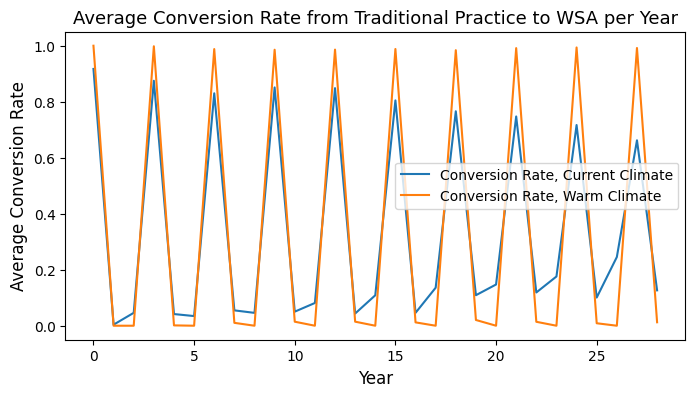

In [43]:
plot_conversion_rates(df_5_no_c, df_5_no_w)

In [44]:
df_5_no_w[(df_5_no_w['UniqueID'] == '2023-11-28 19:53:28.375456') & (df_5_no_w['Year'] == 1)]['TotalYearRainfall']

1        434.277079
32       434.277079
63       434.277079
94       434.277079
125      434.277079
            ...    
24646    434.277079
24677    434.277079
24708    434.277079
24739    434.277079
24770    434.277079
Name: TotalYearRainfall, Length: 800, dtype: float64

In [45]:
def get_rainfall_per_year(df):
    

SyntaxError: incomplete input (2684030480.py, line 2)

In [ ]:
def get_avg_rainfall(df):
    runs = df['UniqueID'].unique()
    rainfall_arrays = []
    for run in runs:
        df = df[df['UniqueID'] == run]
        for year in df['Year'].unique():
            rainfall = np.average(df[df['Year' == year]]['TotalYearRainfall'], axis=0)
            rainfall_arrays.append(rainfall)
    avg = np.average(rainfall_arrays, axis=0)
    return avg
    #return rainfall_arrays

In [ ]:
get_avg_rainfall(df_5_no_c)

KeyError: False

KeyError: False

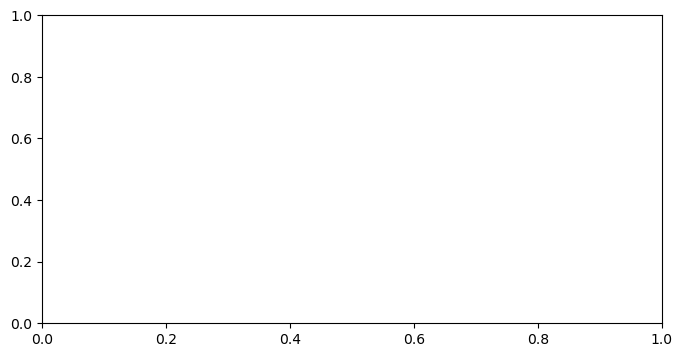

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(get_avg_rainfall(df_5_no_c), label = "Rainfall, Current Climate")

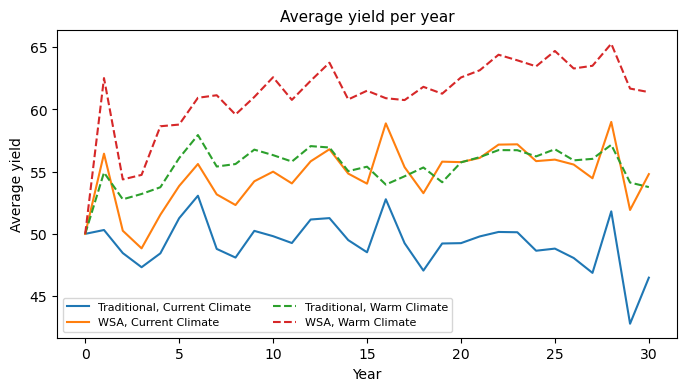

In [ ]:
plot_avg_yield(df_5_hj_c, df_5_hj_w)

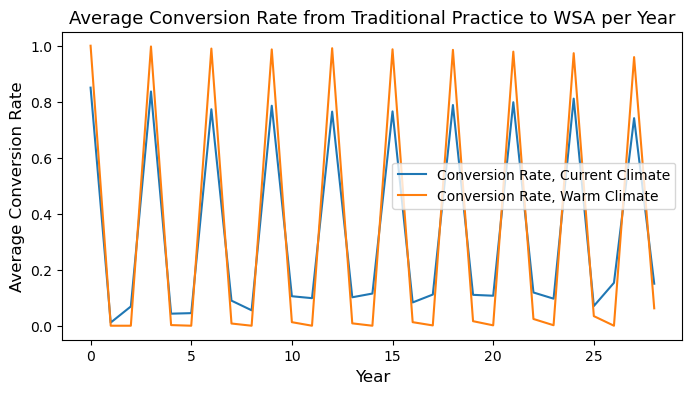

In [ ]:
plot_conversion_rates(df_5_hj_c, df_5_hj_w)

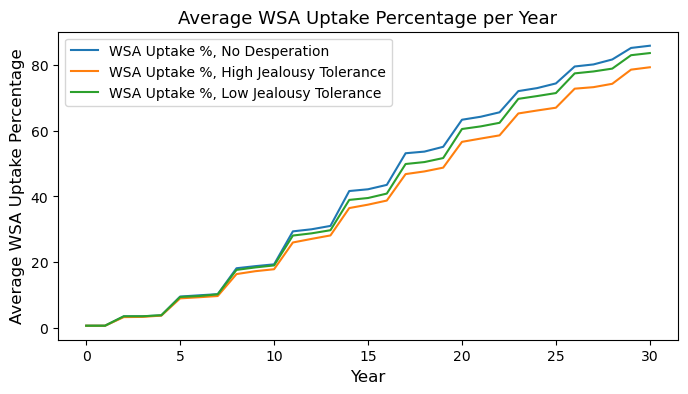

In [ ]:
plot_wsa_uptake_soc(df_5_no_c, df_5_hj_c, df_5_lj_c)

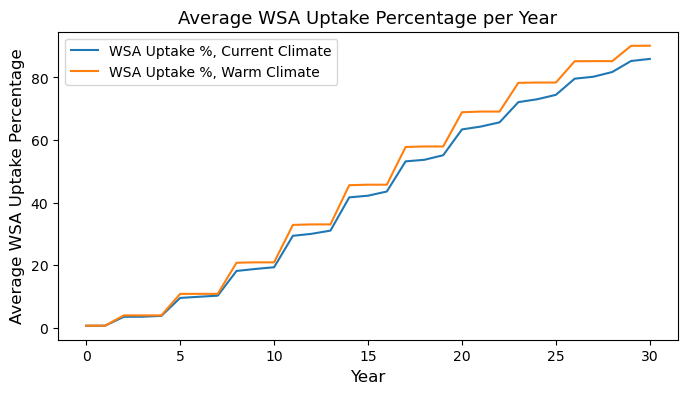

In [ ]:
plot_wsa_uptake_cli(df_5_no_c, df_5_no_w)

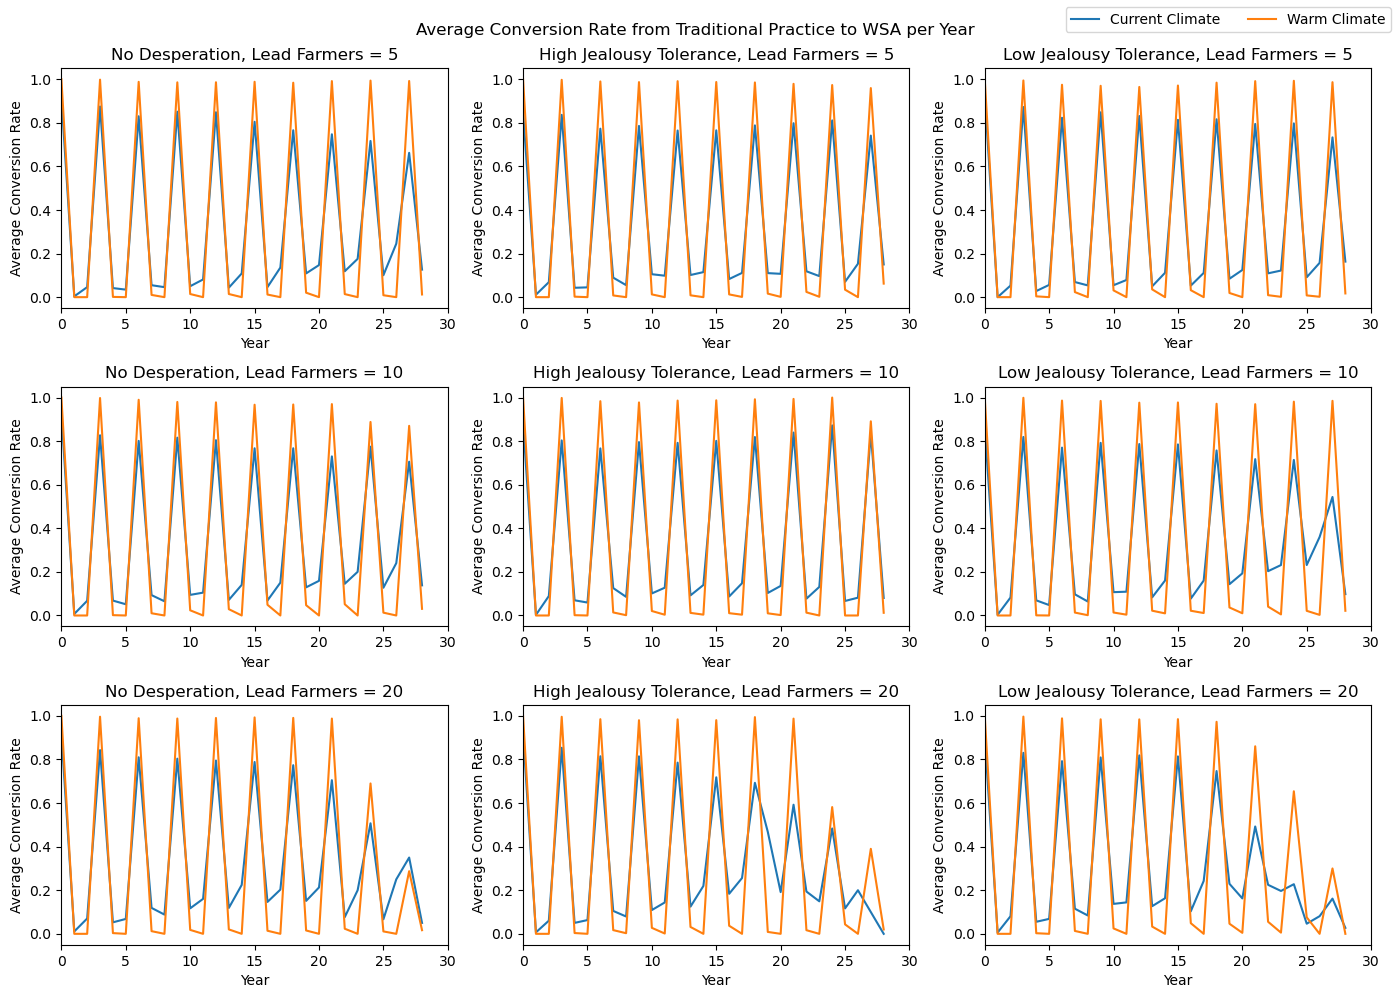

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle('Average Conversion Rate from Traditional Practice to WSA per Year')
axs[0, 0].plot(get_avg_convert_rate_per_year(df_5_no_c)[1:], label = "Current Climate")
axs[0, 0].plot(get_avg_convert_rate_per_year(df_5_no_w)[1:], label = "Warm Climate")
axs[0, 0].set_title("No Desperation, Lead Farmers = 5")
axs[0, 1].plot(get_avg_convert_rate_per_year(df_5_hj_c)[1:])
axs[0, 1].plot(get_avg_convert_rate_per_year(df_5_hj_w)[1:])
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5")
axs[0, 2].plot(get_avg_convert_rate_per_year(df_5_lj_c)[1:])
axs[0, 2].plot(get_avg_convert_rate_per_year(df_5_lj_w)[1:])
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5")
axs[1, 0].plot(get_avg_convert_rate_per_year(df_10_no_c)[1:])
axs[1, 0].plot(get_avg_convert_rate_per_year(df_10_no_w)[1:])
axs[1, 0].set_title("No Desperation, Lead Farmers = 10")
axs[1, 1].plot(get_avg_convert_rate_per_year(df_10_hj_c)[1:])
axs[1, 1].plot(get_avg_convert_rate_per_year(df_10_hj_w)[1:])
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10")
axs[1, 2].plot(get_avg_convert_rate_per_year(df_10_lj_c)[1:])
axs[1, 2].plot(get_avg_convert_rate_per_year(df_10_lj_w)[1:])
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10")
axs[2, 0].plot(get_avg_convert_rate_per_year(df_20_no_c)[1:])
axs[2, 0].plot(get_avg_convert_rate_per_year(df_20_no_w)[1:])
axs[2, 0].set_title("No Desperation, Lead Farmers = 20")
axs[2, 1].plot(get_avg_convert_rate_per_year(df_20_hj_c)[1:])
axs[2, 1].plot(get_avg_convert_rate_per_year(df_20_hj_w)[1:])
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20")
axs[2, 2].plot(get_avg_convert_rate_per_year(df_20_lj_c)[1:])
axs[2, 2].plot(get_avg_convert_rate_per_year(df_20_lj_w)[1:])
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20")
for i in range(3):
    for ii in range(3):
        axs[i, ii].set_xlabel('Year')
        axs[i, ii].set_ylabel('Average Conversion Rate')
        axs[i, ii].set_xlim([0, 30])
fig.legend(ncol=2)
fig.tight_layout()

In [ ]:
get_wsa_groups(df_5_no_c).get_group(0.0).tolist()

[50.0,
 50.332126549157714,
 48.4455203480589,
 47.28557575453184,
 48.42793125135831,
 51.241786661563694,
 53.056622492111835,
 48.73466745529639,
 47.92627591766667,
 50.154151303431384,
 49.71171691183862,
 49.07544613367809,
 50.98965180611384,
 51.12910961432868,
 49.19087419654345,
 48.058127090074905,
 52.58669803466808,
 48.599625864261284,
 46.30180247311206,
 48.67192698583608,
 48.66831775648878,
 49.43449159748877,
 49.65584873357154,
 49.495235355075145,
 47.96576410202393,
 48.392213868161605,
 47.43923594161762,
 46.35897949250822,
 51.64928245480897,
 42.07722044533643,
 46.17515968172805]

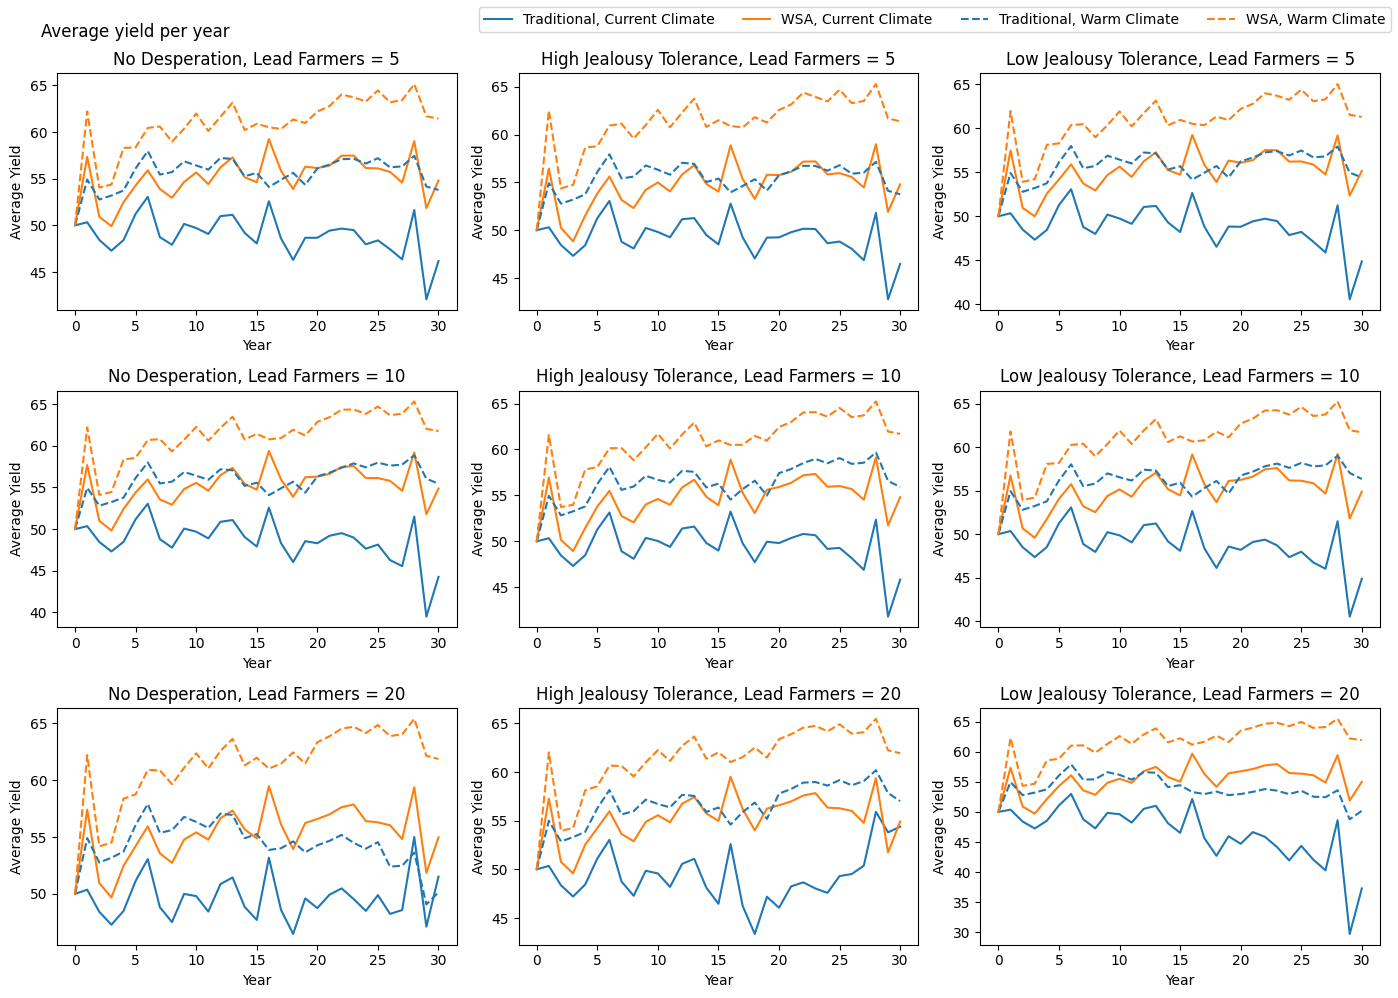

In [57]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Average yield per year", x=0.1)
axs[0, 0].plot(get_wsa_groups(df_5_no_c).get_group(0.0).tolist(), label = "Traditional, Current Climate", color='C0')
axs[0, 0].plot(get_wsa_groups(df_5_no_c).get_group(1.0).tolist(), label = "WSA, Current Climate", color='C1')
axs[0, 0].plot(get_wsa_groups(df_5_no_w).get_group(0.0).tolist(), label = "Traditional, Warm Climate", color='C0', linestyle = 'dashed')
axs[0, 0].plot(get_wsa_groups(df_5_no_w).get_group(1.0).tolist(), label = "WSA, Warm Climate", color='C1', linestyle = 'dashed')
axs[0, 0].set_title("No Desperation, Lead Farmers = 5")
axs[0, 1].plot(get_wsa_groups(df_5_hj_c).get_group(0.0).tolist(), color='C0')
axs[0, 1].plot(get_wsa_groups(df_5_hj_c).get_group(1.0).tolist(), color='C1')
axs[0, 1].plot(get_wsa_groups(df_5_hj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[0, 1].plot(get_wsa_groups(df_5_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5")
axs[0, 2].plot(get_wsa_groups(df_5_lj_c).get_group(0.0).tolist(), color='C0')
axs[0, 2].plot(get_wsa_groups(df_5_lj_c).get_group(1.0).tolist(), color='C1')
axs[0, 2].plot(get_wsa_groups(df_5_lj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[0, 2].plot(get_wsa_groups(df_5_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5")
axs[1, 0].plot(get_wsa_groups(df_10_no_c).get_group(0.0).tolist(), color='C0')
axs[1, 0].plot(get_wsa_groups(df_10_no_c).get_group(1.0).tolist(), color='C1')
axs[1, 0].plot(get_wsa_groups(df_10_no_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 0].plot(get_wsa_groups(df_10_no_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 0].set_title("No Desperation, Lead Farmers = 10")
axs[1, 1].plot(get_wsa_groups(df_10_hj_c).get_group(0.0).tolist(), color='C0')
axs[1, 1].plot(get_wsa_groups(df_10_hj_c).get_group(1.0).tolist(), color='C1')
axs[1, 1].plot(get_wsa_groups(df_10_hj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 1].plot(get_wsa_groups(df_10_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10")
axs[1, 2].plot(get_wsa_groups(df_10_lj_c).get_group(0.0).tolist(), color='C0')
axs[1, 2].plot(get_wsa_groups(df_10_lj_c).get_group(1.0).tolist(), color='C1')
axs[1, 2].plot(get_wsa_groups(df_10_lj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[1, 2].plot(get_wsa_groups(df_10_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10")
axs[2, 0].plot(get_wsa_groups(df_20_no_c).get_group(0.0).tolist(), color='C0')
axs[2, 0].plot(get_wsa_groups(df_20_no_c).get_group(1.0).tolist(), color='C1')
axs[2, 0].plot(get_wsa_groups(df_20_no_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 0].plot(get_wsa_groups(df_20_no_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 0].set_title("No Desperation, Lead Farmers = 20")
axs[2, 1].plot(get_wsa_groups(df_20_hj_c).get_group(0.0).tolist(), color='C0')
axs[2, 1].plot(get_wsa_groups(df_20_hj_c).get_group(1.0).tolist(), color='C1')
axs[2, 1].plot(get_wsa_groups(df_20_hj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 1].plot(get_wsa_groups(df_20_hj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20")
axs[2, 2].plot(get_wsa_groups(df_20_lj_c).get_group(0.0).tolist(), color='C0')
axs[2, 2].plot(get_wsa_groups(df_20_lj_c).get_group(1.0).tolist(), color='C1')
axs[2, 2].plot(get_wsa_groups(df_20_lj_w).get_group(0.0).tolist(), color='C0', linestyle = 'dashed')
axs[2, 2].plot(get_wsa_groups(df_20_lj_w).get_group(1.0).tolist(), color='C1', linestyle = 'dashed')
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20")
for i in range(3):
    for ii in range(3):
        axs[i, ii].set_xlabel('Year')
        axs[i, ii].set_ylabel('Average Yield')
        #axs[i, ii].set_xlim([0, 30])
        #axs[i, ii].set_ylim([100, 240])
fig.legend(ncol=4)
fig.tight_layout()
# plt.show()

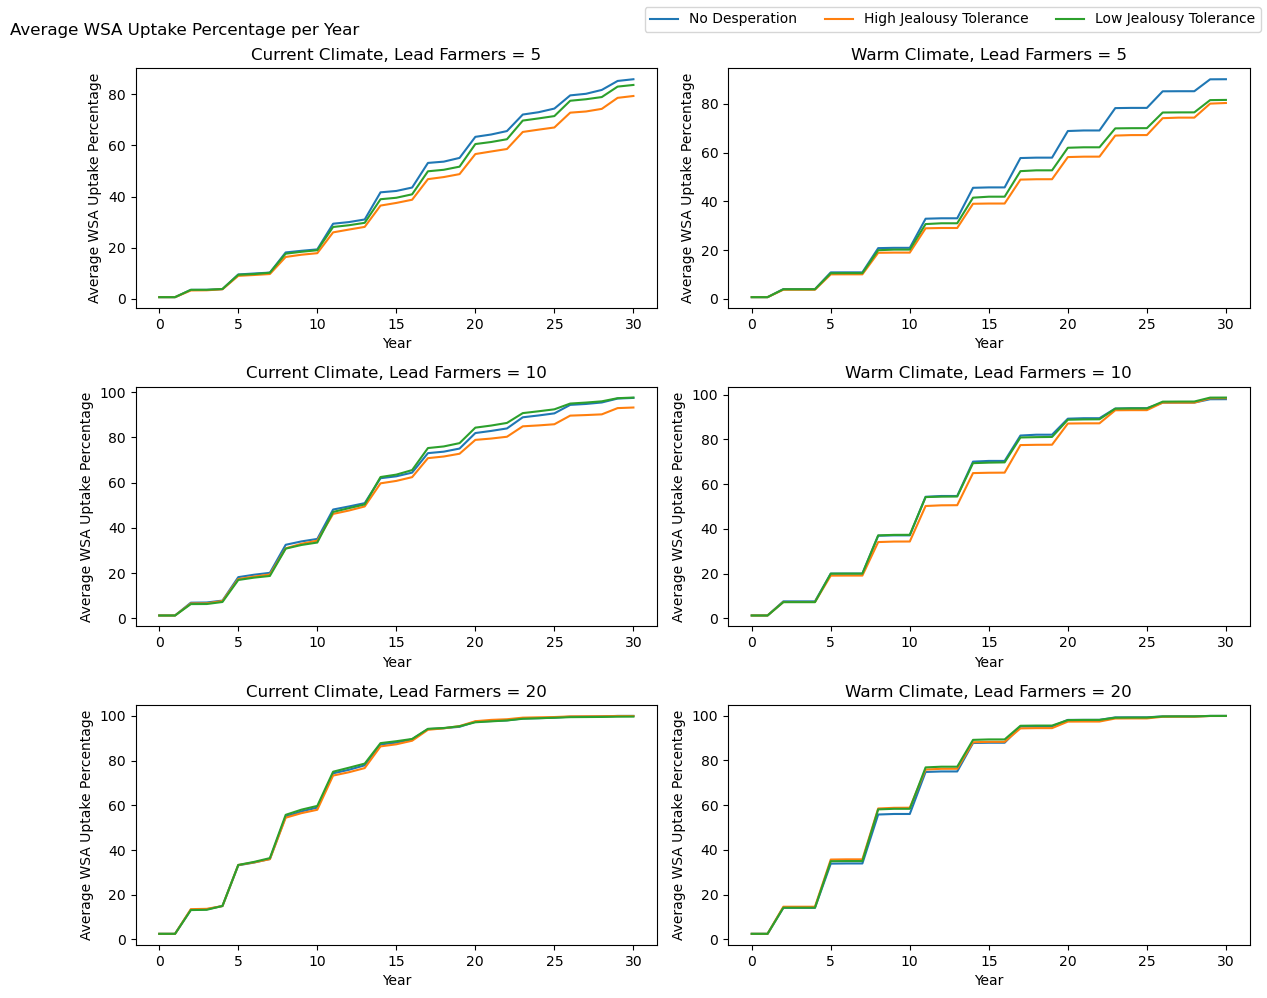

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Average WSA Uptake Percentage per Year", x=0.1)

axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_c), label = "No Desperation")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_hj_c), label = "High Jealousy Tolerance")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_lj_c), label = "Low Jealousy Tolerance")
axs[0, 0].set_title("Current Climate, Lead Farmers = 5")
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_no_w))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_w))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_lj_w))
axs[0, 1].set_title("Warm Climate, Lead Farmers = 5")

axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_hj_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_lj_c))
axs[1, 0].set_title("Current Climate, Lead Farmers = 10")
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_no_w))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_w))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_lj_w))
axs[1, 1].set_title("Warm Climate, Lead Farmers = 10")

axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_hj_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_lj_c))
axs[2, 0].set_title("Current Climate, Lead Farmers = 20")
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_no_w))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_w))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_lj_w))
axs[2, 1].set_title("Warm Climate, Lead Farmers = 20")

for i in range(3):
    for ii in range(2):
        axs[i, ii].set_xlabel('Year')
        axs[i, ii].set_ylabel('Average WSA Uptake Percentage')
        #axs[i, ii].set_xlim([0, 30])
        #axs[i, ii].set_ylim([0, 120])
fig.legend(ncol=3)
fig.tight_layout()

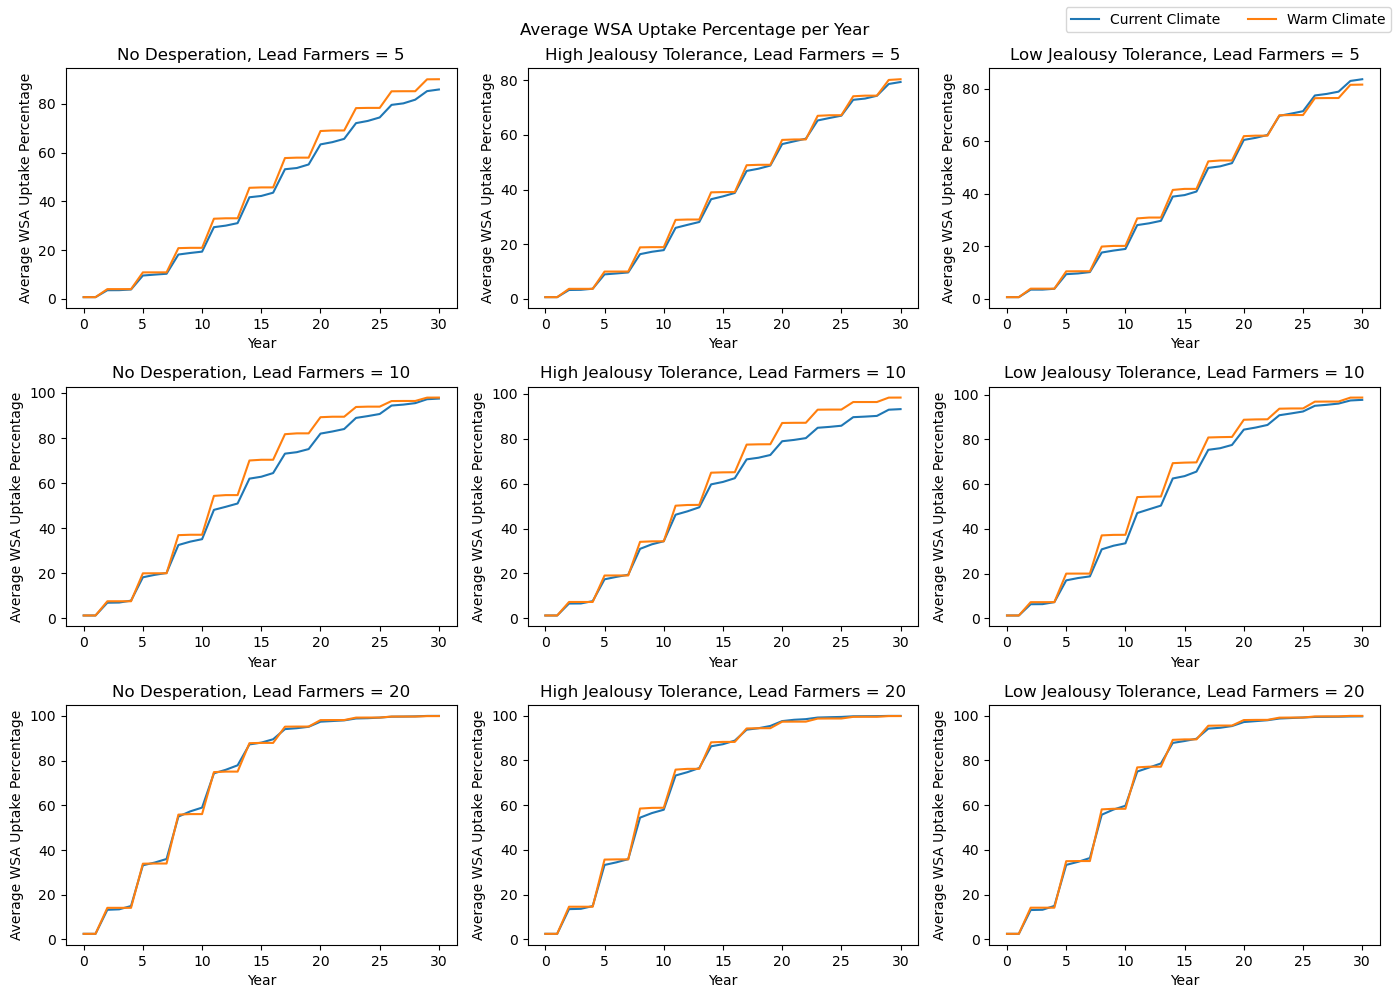

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
fig.suptitle("Average WSA Uptake Percentage per Year")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_c), label = "Current Climate")
axs[0, 0].plot(get_avg_wsa_uptake_per_year(df_5_no_w), label = "Warm Climate")
axs[0, 0].set_title("No Desperation, Lead Farmers = 5")

axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_c))
axs[0, 1].plot(get_avg_wsa_uptake_per_year(df_5_hj_w))
axs[0, 1].set_title("High Jealousy Tolerance, Lead Farmers = 5")

axs[0, 2].plot(get_avg_wsa_uptake_per_year(df_5_lj_c))
axs[0, 2].plot(get_avg_wsa_uptake_per_year(df_5_lj_w))
axs[0, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 5")

axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_c))
axs[1, 0].plot(get_avg_wsa_uptake_per_year(df_10_no_w))
axs[1, 0].set_title("No Desperation, Lead Farmers = 10")

axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_c))
axs[1, 1].plot(get_avg_wsa_uptake_per_year(df_10_hj_w))
axs[1, 1].set_title("High Jealousy Tolerance, Lead Farmers = 10")

axs[1, 2].plot(get_avg_wsa_uptake_per_year(df_10_lj_c))
axs[1, 2].plot(get_avg_wsa_uptake_per_year(df_10_lj_w))
axs[1, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 10")

axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_c))
axs[2, 0].plot(get_avg_wsa_uptake_per_year(df_20_no_w))
axs[2, 0].set_title("No Desperation, Lead Farmers = 20")

axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_c))
axs[2, 1].plot(get_avg_wsa_uptake_per_year(df_20_hj_w))
axs[2, 1].set_title("High Jealousy Tolerance, Lead Farmers = 20")

axs[2, 2].plot(get_avg_wsa_uptake_per_year(df_20_lj_c))
axs[2, 2].plot(get_avg_wsa_uptake_per_year(df_20_lj_w))
axs[2, 2].set_title("Low Jealousy Tolerance, Lead Farmers = 20")

for i in range(3):
    for ii in range(3):
        axs[i, ii].set_xlabel('Year')
        axs[i, ii].set_ylabel('Average WSA Uptake Percentage')
        #axs[i, ii].set_xlim([0, 30])
fig.legend(ncol=2)
fig.tight_layout()


In [62]:
df_5_no_w

,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement,average-yield-per-field
0,0.0,0,-24.5,22.50,0.0,0.0,200.000000,0.000000,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,50.000000
1,0.0,1,-24.5,22.50,0.0,0.0,232.529866,434.277079,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,58.132467
2,0.0,2,-24.5,22.50,0.0,0.0,221.982791,790.809540,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,55.495698
3,0.0,3,-24.5,22.50,0.0,0.0,225.806924,881.814459,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,56.451731
4,0.0,4,-24.5,22.50,0.0,0.0,228.363800,1020.357248,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0,57.090950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,19.0,-16.25,1.0,1.0,241.879130,1469.055054,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.469782
248005,799.0,27,19.0,-16.25,1.0,1.0,242.355640,1631.687391,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,60.588910
248006,799.0,28,19.0,-16.25,1.0,1.0,247.686274,1428.967197,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,61.921568
248007,799.0,29,19.0,-16.25,1.0,1.0,235.229544,1557.718957,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0,58.807386


In [68]:
heatmapdf = df_5_no_w.groupby(["owner-id","UniqueID"])[['xcor','ycor','implements-WSA','owner-knows-WSA']].mean().reset_index()

In [110]:
def getheatmapgroups(data):
    data['avg-yield'] = data['yield'] / data['who']
    new_data = data.groupby(["owner-id","UniqueID"])[['xcor','ycor','implements-WSA','owner-knows-WSA','avg-yield']].mean().reset_index()
    return new_data

In [111]:
listOfDFs = [df_10_hj_c,df_10_hj_w,df_10_lj_c,df_10_lj_w,df_10_no_c,df_10_no_w,df_20_hj_c,df_20_hj_w,df_20_lj_c,df_20_lj_w,df_20_no_c,df_20_no_w,df_5_hj_c,df_5_hj_w,df_5_lj_c,df_5_lj_w,df_5_no_c,df_5_no_w]

In [112]:
groupedDF1 = []
for data in listOfDFs:
    groupedDF1.append(getheatmapgroups(data))

In [113]:
allJoin = pd.concat(groupedDF1)
allJoin

,owner-id,UniqueID,xcor,ycor,implements-WSA,owner-knows-WSA,avg-yield
0,0.0,2023-11-28 19:16:50.182033,13.00,-15.50,0.580645,0.709677,49.570401
1,0.0,2023-11-28 19:16:51.666398,10.75,7.00,0.838710,0.935484,57.651583
2,0.0,2023-11-28 19:16:56.260273,13.00,1.20,0.645161,0.741935,55.169157
3,0.0,2023-11-28 19:16:56.673673,24.00,-3.50,0.548387,0.645161,53.514995
4,0.0,2023-11-28 19:16:57.999182,-6.00,-10.00,0.354839,0.451613,50.87807
...,...,...,...,...,...,...,...
7995,799.0,2023-11-28 19:53:56.198497,-24.50,9.00,0.548387,0.645161,60.692876
7996,799.0,2023-11-28 19:54:05.154361,21.00,14.00,0.548387,0.645161,61.557219
7997,799.0,2023-11-28 19:54:12.260577,13.00,-24.50,0.741935,0.838710,55.806615
7998,799.0,2023-11-28 19:54:14.437935,-16.00,13.50,0.000000,0.000000,58.03802


In [114]:
allJoin['radius'] = np.sqrt(allJoin['xcor']*allJoin['xcor'] + allJoin['ycor']*allJoin['ycor'])

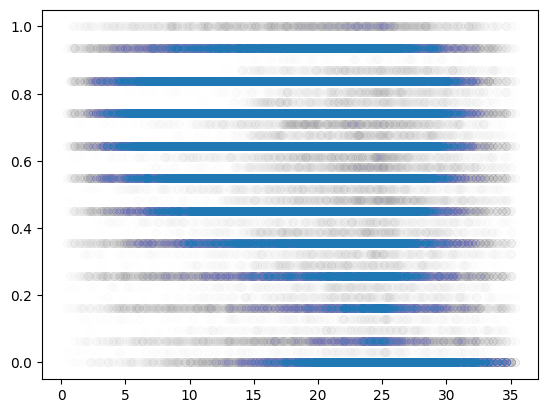

In [121]:
plt.scatter(allJoin['radius'],allJoin['implements-WSA'],alpha = 0.002)

{'whiskers': [<matplotlib.lines.Line2D at 0x295865f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2958672d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x295851c50>],
 'medians': [<matplotlib.lines.Line2D at 0x295874490>],
 'fliers': [<matplotlib.lines.Line2D at 0x295874cd0>],
 'means': []}

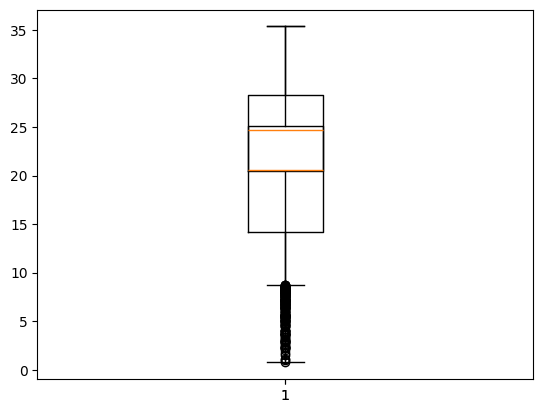

In [127]:
plt.boxplot(allJoin.loc[allJoin['implements-WSA'] == 1]['radius'])
plt.boxplot(allJoin.loc[allJoin['implements-WSA'] == 0]['radius'])

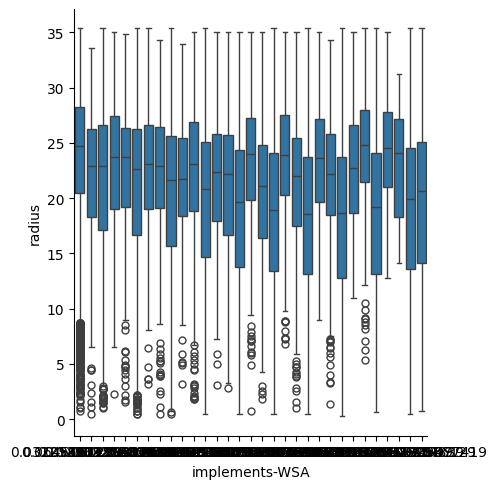

In [129]:
sns.catplot(data=allJoin, x="implements-WSA", y="radius", kind="box")

In [128]:
import seaborn as sns

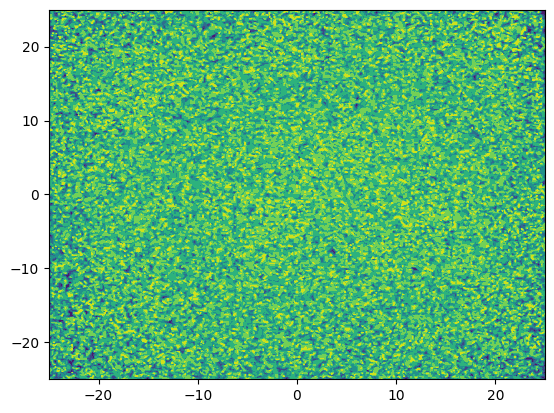

In [124]:
plt.tricontourf(allJoin['xcor'], allJoin['ycor'], allJoin['implements-WSA'])

In [122]:
allJoin

,owner-id,UniqueID,xcor,ycor,implements-WSA,owner-knows-WSA,avg-yield,radius
0,0.0,2023-11-28 19:16:50.182033,13.00,-15.50,0.580645,0.709677,49.570401,20.229928
1,0.0,2023-11-28 19:16:51.666398,10.75,7.00,0.838710,0.935484,57.651583,12.828192
2,0.0,2023-11-28 19:16:56.260273,13.00,1.20,0.645161,0.741935,55.169157,13.055267
3,0.0,2023-11-28 19:16:56.673673,24.00,-3.50,0.548387,0.645161,53.514995,24.253866
4,0.0,2023-11-28 19:16:57.999182,-6.00,-10.00,0.354839,0.451613,50.87807,11.661904
...,...,...,...,...,...,...,...,...
7995,799.0,2023-11-28 19:53:56.198497,-24.50,9.00,0.548387,0.645161,60.692876,26.100766
7996,799.0,2023-11-28 19:54:05.154361,21.00,14.00,0.548387,0.645161,61.557219,25.238859
7997,799.0,2023-11-28 19:54:12.260577,13.00,-24.50,0.741935,0.838710,55.806615,27.735356
7998,799.0,2023-11-28 19:54:14.437935,-16.00,13.50,0.000000,0.000000,58.03802,20.934421


In [ ]:
glue = sns.load_dataset("heatmapdf").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

In [130]:
def getLastYear(data):
    lastYearData = data.loc[data["Year"]]
    new_data = data.groupby(["owner-id","UniqueID"])[['xcor','ycor','implements-WSA','owner-knows-WSA','avg-yield']].mean().reset_index()
    return new_data

In [176]:
twentyFarmers = pd.concat([df_20_hj_c,df_20_hj_w,df_20_lj_c,df_20_lj_w,df_20_no_c,df_20_no_w])
tenFarmers = pd.concat([df_10_hj_c,df_10_hj_w,df_10_lj_c,df_10_lj_w,df_10_no_c,df_10_no_w])
fiveFarmers = pd.concat([df_5_hj_c,df_5_hj_w,df_5_lj_c,df_5_lj_w,df_5_no_c,df_5_no_w])

currentClim = pd.concat([df_20_hj_c,df_20_lj_c,df_20_no_c,df_10_hj_c,df_10_lj_c,df_10_no_c,df_5_hj_c,df_5_lj_c,df_5_no_c])
warmClim = pd.concat([df_20_hj_w,df_20_lj_w,df_20_no_w,df_10_hj_w,df_10_lj_w,df_10_no_w,df_5_hj_w,df_5_lj_w,df_5_no_w])

no = pd.concat([df_20_no_c,df_20_no_w,df_10_no_c,df_10_no_w,df_5_no_c,df_5_no_w])
hj = pd.concat([df_20_hj_c,df_20_hj_w,df_10_hj_c,df_10_hj_w,df_5_hj_c,df_5_hj_w])
lj = pd.concat([df_20_lj_c,df_20_lj_w,df_10_lj_c,df_10_lj_w,df_5_lj_c,df_5_lj_w])


In [188]:
disInfo = []
for dataSet in [twentyFarmers, tenFarmers, fiveFarmers]:
    meanDF = dataSet.loc[dataSet['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean().mean()
    stdDF = dataSet.loc[dataSet['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean().std()
    disInfo.append((meanDF,stdDF))

In [189]:
disInfo

[(0.9985, 0.004929588974511672),
 (0.972, 0.036404332485692054),
 (0.8353333333333333, 0.11034299055659019)]

In [158]:
from scipy import stats

In [198]:
twentyMean = twentyFarmers.loc[twentyFarmers['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()
tenMean = tenFarmers.loc[tenFarmers['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()
fiveMean = fiveFarmers.loc[fiveFarmers['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()

warmMean = warmClim.loc[warmClim['Year'] == 15].groupby(['UniqueID'])['implements-WSA'].mean()
currentMean = currentClim.loc[currentClim['Year'] == 15].groupby(['UniqueID'])['implements-WSA'].mean()

noMean = no.loc[no['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()
hjMean = hj.loc[hj['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()
ljMean = lj.loc[lj['Year'] == 30].groupby(['UniqueID'])['implements-WSA'].mean()

stats.ttest_ind(tenMean, fiveMean, equal_var = False)

TtestResult(statistic=9.110823959775438, pvalue=1.3479205345347045e-13, df=71.69356208033932)